# #############################


# RUN 2 - SHARPER FOCUS ON FEATURE SELECTION AND ENGINEERING

# SECTION: Library Installations and GPU checks

In [1]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check if GPU (Metal) is available
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version: 2.16.2
Num GPUs Available: 1


In [2]:
import tensorflow as tf
import time

# Create a large random tensor
tensor_a = tf.random.normal([1000, 1000])
tensor_b = tf.random.normal([1000, 1000])

# Perform matrix multiplication on GPU
start_time = time.time()
result = tf.matmul(tensor_a, tensor_b)
end_time = time.time()

print("Time taken for matrix multiplication:", end_time - start_time, "seconds")

Time taken for matrix multiplication: 0.002978086471557617 seconds


2025-04-06 00:06:29.659770: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-04-06 00:06:29.659798: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-06 00:06:29.659803: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-06 00:06:29.659817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-06 00:06:29.659830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# SECTION: Imports and more Libary Installs

In [3]:
#! brew install cmake

In [4]:
#! pip install tensorflow-datasets

In [5]:
# ! pip install scikit-learn

In [6]:
# ! pip install shap


In [7]:
# ! pip install keras-tuner

In [8]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow_datasets as tfds
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

from scipy import stats
from scipy.stats import boxcox

import keras
import keras_tuner as kt

from keras import layers, models
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# shap
#import shap

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# others
import re
from sklearn.decomposition import PCA
#from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


random.seed(42)
%matplotlib inline

# FILL IN CODE HERE #
RANDOM_SAMPLES_VAL = 500000 #To make computing on local machine, colab palatable, we will use a random sample for the exercise  
RANDOM_STATE = 42

# SECTION: Our helper and utility functions

In [9]:
#VS - II helpful functions

# summarizes a data frame in a printer friendly way
def summarize_dataframe(df):
    summary = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Null Count': df.isnull().sum().values,
        'Non-Null Count': df.notnull().sum().values,
        'Unique Count': df.nunique().values
    })
    return summary

# SECTION: Data Load

In [10]:
#Retail Data.csv is our master data file from Kaggle
retail_df=pd.read_csv('retail_data.csv')

In [11]:
retail_df.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [12]:
retail_df.shape

(1000000, 78)

In [13]:
summarize_dataframe(retail_df)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,customer_id,int64,0,1000000,1000000
1,age,int64,0,1000000,62
2,gender,object,0,1000000,3
3,income_bracket,object,0,1000000,3
4,loyalty_program,object,0,1000000,2
...,...,...,...,...,...
73,email_subscriptions,object,0,1000000,2
74,app_usage,object,0,1000000,3
75,website_visits,int64,0,1000000,100
76,social_media_engagement,object,0,1000000,3


In [14]:
retail_df.iloc[:5]

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [15]:
retail_df.columns

Index(['customer_id', 'age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'transaction_date',
       'product_id', 'product_category', 'quantity', 'unit_price',
       'discount_applied', 'payment_method', 'store_location',
       'transaction_hour', 'day_of_week', 'week_of_year', 'month_of_year',
       'avg_purchase_value', 'purchase_frequency', 'last_purchase_date',
       'avg_discount_used', 'preferred_store', 'online_purchases',
       'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', '

# Initial EDA Comments: Initial Observations of our data set

    - Shape: 1000000 x 78. 1 M rows, 78 columns
    - No columns have nulls / missing values.
    - Names of all columns are lower case, with no spaces, and use underscore. Names of all columns seem nicely formatted.

# Business Logic and Data Issue Mitigation
    Data does not have ground truth for Customer Lifetime Value (CLV) which is typically a formulaic calculation based on
    Average Purchase Value x Purchase Frtequency x Customer Lifespan (CL)

    CL does not exist in data, so we derive it from loyalty membership years using a conditional logic. 
    
    Final CLV = mean of calucations from APV x PF x CL, and Total sales x CL. We also add some random noise to the calculated CLV to estimate final CLV for a sample. 

In [16]:
##Business logic calucation functions

def calculate_CL(membership_years):
    ## Caculates Customer lifespan in years
    # from (loyalty) membership years.

    #cl = customer lifespan in years (can be fraction)
    cl = 0.0
    #1 calcuate CLV1 from membership years
    if (membership_years >= 7.0 ):
        cl  = 0.6 * membership_years
    elif (membership_years >= 4) & (membership_years < 7.0):
        cl = 0.8 * membership_years
    elif (membership_years > 0) & (membership_years < 4.0):
        cl = 1 * membership_years
    else:
        cl = 0.5 # for loyalty membership =0 years 
    return cl

def map_purchase_freq_to_nums(purchase_frequency):
    ##takes in daily, weekly, yearly labels for purchase frequency
    # and converts it to a number using a rules formula
    frequency_map = {
        'Daily': 365,
        'Weekly': 52,
        'Monthly': 12,
        'Yearly': 1
    }
    return frequency_map.get(purchase_frequency)


def calculate_CLV(average_purchase_value, purchase_frequency,customer_lifespan,total_sales, add_noise_std_dev=0.1):
    ## calculates the (ground truth) customer lifetime value from
    #average pruchase value, purchase frequency, and total sales

    clv1 = float(average_purchase_value) * float(purchase_frequency) * float(customer_lifespan)
    clv2 = total_sales * customer_lifespan
    clv = (clv1 + clv2) / 2.0

    #Now we will add some noise to the growth truth clv calculation
    # Add Gaussian noise (normal distribution centered at 0, with standard deviation add_noise_std_dev * base calcuated clv)
    noise = np.random.normal(0, add_noise_std_dev * clv)
    clv = clv + noise

    return clv

In [17]:
#extract customer lifespan
retail_df['customer_lifespan'] = retail_df['membership_years'].apply(calculate_CL)
#convert purchase frequency to integer values
retail_df['purchase_frequency'] = retail_df['purchase_frequency'].apply(map_purchase_freq_to_nums)

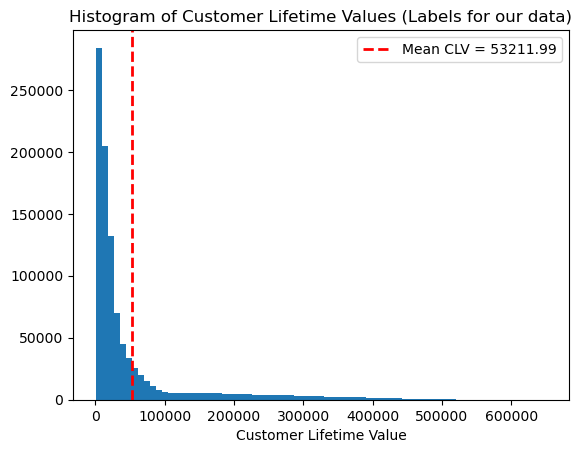

retail_df.shape =(1000000, 80)


In [18]:
#Cacluate customer_lifetime_value
retail_df['customer_lifetime_value'] = retail_df.apply(lambda row: calculate_CLV(row['avg_purchase_value'],
                                                                                 row['purchase_frequency'],
                                                                                 row['customer_lifespan'],
                                                                                 row['total_sales']), axis=1)
mean_clv = retail_df['customer_lifetime_value'].mean()

plt.clf()
plt.hist(retail_df['customer_lifetime_value'], bins=75)
plt.axvline(mean_clv, color='red', linestyle='dashed', linewidth=2, label=f'Mean CLV = {mean_clv:.2f}')
plt.xlabel('Customer Lifetime Value')
plt.title('Histogram of Customer Lifetime Values (Labels for our data)')
plt.legend()
plt.show()
print(f"{retail_df.shape =}")

# MILESTONE: we have our ground truth Y label (customer lifetime value)
    1. Note: This ground truth Y label for customer lifetime value has some noise built into it. 

# Extract features for Lifetime value modeling

In [19]:
## Select a random sample of RANDOM_SAMPLES_VAL (e.g. 100K) rows to make the ML model run on limited compute resources
retail_df = retail_df.sample(n=RANDOM_SAMPLES_VAL, random_state=RANDOM_STATE)

# FEATURE SELECTION based on domain knowledge
Best 12 Features for Predicting Customer Lifetime Value (CLV), covering multiple aspects of customr value such as purchase value, purchase frequency, indicators for customer lifespan 
1.	age – Age provides insights into the customer lifecycle and spending potential.
2. income_bracket – Income levels are often correlated with purchasing power and customer lifetime value.
3. loyalty_program – Participation in loyalty programs suggests customer commitment and a higher likelihood of repeat purchases.
4. marital_status – Marital status can influence purchasing behavior and long-term retention.
5. number_of_children – Families may have different buying patterns, contributing to future spending.
6. education_level – Education can correlate with spending habits and overall purchasing behavior.
7. occupation – Certain occupations may have higher or lower spending potential, which influences CLV.
8. total_transactions – Total number of transactions is a strong indicator of past engagement, which can correlate with future value.
9. total_items_purchased – Similar to total transactions, this feature reflects overall engagement and purchase habits.
10. avg_discount_used – The amount of discounts used can influence future behavior, as customers who respond well to promotions might have a higher lifetime value.
11. customer_support_calls – The frequency of customer support calls could indicate either problems or high engagement, both of which might affect long-term value.
12. days_since_last_purchase – This metric is key for predicting future purchases and CLV, as recent customers are more likely to make another purchase.


# 
    Note since we use average purchase value, purchase frequency, membership years, and total sales to calcuate our ground truth customer lifetime value for each customer, these features are not included to prevent data leakage.


In [20]:
desired_columns = ['age', 'income_bracket', 'loyalty_program', 'marital_status', 'number_of_children', 
                   'education_level', 'occupation', 'total_transactions', 'total_items_purchased', 
                   'avg_discount_used', 'customer_support_calls', 'days_since_last_purchase','customer_lifetime_value']
lftv_data = retail_df[desired_columns]
lftv_data.shape

(500000, 13)

In [21]:
print(summarize_dataframe(lftv_data))

                 Column Name Data Type  Null Count  Non-Null Count  \
0                        age     int64           0          500000   
1             income_bracket    object           0          500000   
2            loyalty_program    object           0          500000   
3             marital_status    object           0          500000   
4         number_of_children     int64           0          500000   
5            education_level    object           0          500000   
6                 occupation    object           0          500000   
7         total_transactions     int64           0          500000   
8      total_items_purchased     int64           0          500000   
9          avg_discount_used   float64           0          500000   
10    customer_support_calls     int64           0          500000   
11  days_since_last_purchase     int64           0          500000   
12   customer_lifetime_value   float64           0          500000   

    Unique Count  


In [22]:
lftv_data.head()

,age,income_bracket,loyalty_program,marital_status,number_of_children,education_level,occupation,total_transactions,total_items_purchased,avg_discount_used,customer_support_calls,days_since_last_purchase,customer_lifetime_value
987231,60,Medium,Yes,Divorced,3,Master's,Unemployed,9,454,0.49,1,329,53550.406428
79954,63,Low,No,Single,0,High School,Employed,40,455,0.36,3,145,4330.984420
567130,72,Medium,Yes,Single,4,High School,Unemployed,60,493,0.24,14,95,4331.600283
500891,34,High,Yes,Divorced,3,Master's,Employed,11,196,0.43,7,124,46932.814418
55399,77,Medium,No,Single,4,Master's,Retired,17,35,0.48,17,240,112171.333706


In [23]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,age,int64,0,500000,62
1,income_bracket,object,0,500000,3
2,loyalty_program,object,0,500000,2
3,marital_status,object,0,500000,3
4,number_of_children,int64,0,500000,5
5,education_level,object,0,500000,4
6,occupation,object,0,500000,4
7,total_transactions,int64,0,500000,99
8,total_items_purchased,int64,0,500000,499
9,avg_discount_used,float64,0,500000,51


In [24]:
numerical_features = [
    'age', 'number_of_children', 'total_transactions', 'total_items_purchased',
    'avg_discount_used', 'customer_support_calls', 'days_since_last_purchase',
    'customer_lifetime_value'
]
categorical_features = [
    'income_bracket', 'loyalty_program', 'marital_status',
    'education_level', 'occupation'
]


In [25]:
def encode_my_categorical_feature(df, feature_name, mapping=None, nominal=False, drop_first=True):
    """
    Encodes a single categorical feature in the DataFrame. If the cat feature is ordinal a dictionary map
    is expected ('mapping'); if the cat feature is nominal, one hot encoding is used
    from sk learn and the encoded features with English names are added back to the
    orginal data frame. Modified data frame if returned.
    
    Parameters:
        df (pd.DataFrame): The input dataframe.
        feature_name (str): The column to encode.
        mapping (dict, optional): For ordinal encoding. Required if nominal=False.
        nominal (bool): If True, use OneHotEncoder from sklearn. If False, use mapping.
        drop_first (bool): Whether to drop the first dummy column (for OneHotEncoder).
        
    Returns:
        pd.DataFrame: The modified DataFrame with encoded feature.
    """
    if nominal:
        encoder = OneHotEncoder(drop='first' if drop_first else None, sparse_output=False)
        encoded = encoder.fit_transform(df[[feature_name]])
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([feature_name]), index=df.index)
        df = df.drop(columns=[feature_name])
        df = pd.concat([df, encoded_df], axis=1)
    else:
        if mapping is None:
            raise ValueError("Missing mapping dictionary for ordinal encoding.")
        df[feature_name] = df[feature_name].map(mapping)
    
    return df


In [26]:
for i in range(len(categorical_features)):
    print(f"{categorical_features[i]}: {np.unique(lftv_data[categorical_features[i]])}")

income_bracket: ['High' 'Low' 'Medium']
loyalty_program: ['No' 'Yes']
marital_status: ['Divorced' 'Married' 'Single']
education_level: ["Bachelor's" 'High School' "Master's" 'PhD']
occupation: ['Employed' 'Retired' 'Self-Employed' 'Unemployed']


#
    Ordinal features have meaningful order. Nominal don't 
    Ordinal: income_bracket, education_level
    Nominal: loyalty_program, marital_status, occupation

In [27]:
##Additional Data feature wrangling
#1. Map loyalty program yes, no to 1, 0
#2. Map promotion_effectiveness High, Medium, Low to 3, 2, 1 (retain ordinality ranking)
map1 = { 'Yes': 1, 'No' : 0 }
map2 = { 'High': 3, 'Medium': 2, 'Low': 1 }
map_education = { 'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD': 4 }

In [28]:
lftv_data = encode_my_categorical_feature(lftv_data, 'income_bracket', mapping=map2, nominal=False, drop_first=True)

In [29]:
lftv_data = encode_my_categorical_feature(lftv_data, 'education_level', mapping=map_education, nominal=False, drop_first=True)


In [30]:
lftv_data = encode_my_categorical_feature(lftv_data, 'loyalty_program', mapping=None, nominal=True, drop_first=True)

In [31]:
lftv_data = encode_my_categorical_feature(lftv_data, 'marital_status', mapping=None, nominal=True, drop_first=True)

In [32]:
lftv_data = encode_my_categorical_feature(lftv_data, 'occupation', mapping=None, nominal=True, drop_first=True)

In [33]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,age,int64,0,500000,62
1,income_bracket,int64,0,500000,3
2,number_of_children,int64,0,500000,5
3,education_level,int64,0,500000,4
4,total_transactions,int64,0,500000,99
5,total_items_purchased,int64,0,500000,499
6,avg_discount_used,float64,0,500000,51
7,customer_support_calls,int64,0,500000,20
8,days_since_last_purchase,int64,0,500000,365
9,customer_lifetime_value,float64,0,500000,500000


In [34]:
lftv_data.head()

,age,income_bracket,number_of_children,education_level,total_transactions,total_items_purchased,avg_discount_used,customer_support_calls,days_since_last_purchase,customer_lifetime_value,loyalty_program_Yes,marital_status_Married,marital_status_Single,occupation_Retired,occupation_Self-Employed,occupation_Unemployed
987231,60,2,3,3,9,454,0.49,1,329,53550.406428,1.0,0.0,0.0,0.0,0.0,1.0
79954,63,1,0,1,40,455,0.36,3,145,4330.984420,0.0,0.0,1.0,0.0,0.0,0.0
567130,72,2,4,1,60,493,0.24,14,95,4331.600283,1.0,0.0,1.0,0.0,0.0,1.0
500891,34,3,3,3,11,196,0.43,7,124,46932.814418,1.0,0.0,0.0,0.0,0.0,0.0
55399,77,2,4,3,17,35,0.48,17,240,112171.333706,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
lftv_data.shape

(500000, 16)

# EDA Visualization

<Figure size 640x480 with 0 Axes>

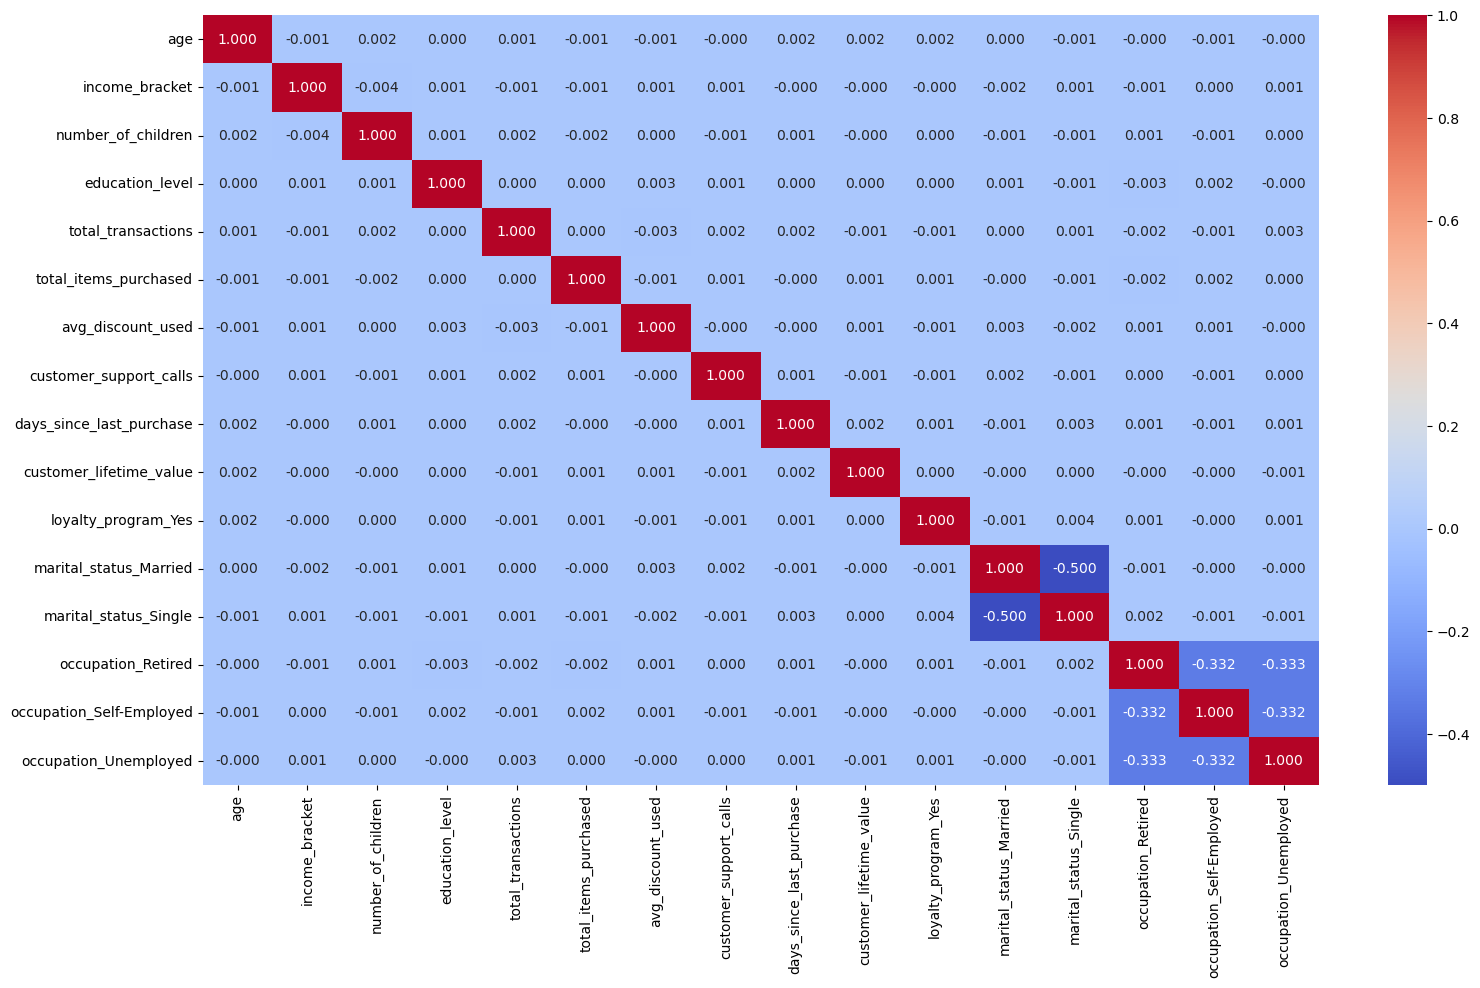

In [36]:
# correlation matrix to visualize relationships
plt.clf()
corr_matrix = lftv_data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.show()

# 
    Most of the correlation values are low and thus features can be retained.
    Occupation feautres have low correlation (abs val ~0.32) b/w them so we will retain them because the value even though 0.33 is still now.
    We will drop marital_status_Single (since it has high correlation with marital_single). We exepect Married people to influence lifetime value more than single.

In [37]:
lftv_data = lftv_data.drop(columns=['marital_status_Single'])

In [38]:
lftv_data.shape

(500000, 15)

# Constructing Our X and Y data set. 

In [39]:
summarize_dataframe(lftv_data)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,age,int64,0,500000,62
1,income_bracket,int64,0,500000,3
2,number_of_children,int64,0,500000,5
3,education_level,int64,0,500000,4
4,total_transactions,int64,0,500000,99
5,total_items_purchased,int64,0,500000,499
6,avg_discount_used,float64,0,500000,51
7,customer_support_calls,int64,0,500000,20
8,days_since_last_purchase,int64,0,500000,365
9,customer_lifetime_value,float64,0,500000,500000


In [40]:
lftv_data.shape

(500000, 15)

In [41]:
lftv_data.head()

,age,income_bracket,number_of_children,education_level,total_transactions,total_items_purchased,avg_discount_used,customer_support_calls,days_since_last_purchase,customer_lifetime_value,loyalty_program_Yes,marital_status_Married,occupation_Retired,occupation_Self-Employed,occupation_Unemployed
987231,60,2,3,3,9,454,0.49,1,329,53550.406428,1.0,0.0,0.0,0.0,1.0
79954,63,1,0,1,40,455,0.36,3,145,4330.984420,0.0,0.0,0.0,0.0,0.0
567130,72,2,4,1,60,493,0.24,14,95,4331.600283,1.0,0.0,0.0,0.0,1.0
500891,34,3,3,3,11,196,0.43,7,124,46932.814418,1.0,0.0,0.0,0.0,0.0
55399,77,2,4,3,17,35,0.48,17,240,112171.333706,0.0,0.0,1.0,0.0,0.0


# Towards x_dataset, and y_dataset  construction
   

In [42]:
#construct our x_data
y_dataset = lftv_data['customer_lifetime_value'].values
x_dataset = lftv_data.drop(columns=['customer_lifetime_value']) # drop the Y label from the X data set

In [43]:
summarize_dataframe(x_dataset)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,age,int64,0,500000,62
1,income_bracket,int64,0,500000,3
2,number_of_children,int64,0,500000,5
3,education_level,int64,0,500000,4
4,total_transactions,int64,0,500000,99
5,total_items_purchased,int64,0,500000,499
6,avg_discount_used,float64,0,500000,51
7,customer_support_calls,int64,0,500000,20
8,days_since_last_purchase,int64,0,500000,365
9,loyalty_program_Yes,float64,0,500000,2


In [44]:
print(f"{ x_dataset.shape = }, { y_dataset.shape = }")
print(f"{ type(x_dataset) = }, { type(y_dataset) = }")

 x_dataset.shape = (500000, 14),  y_dataset.shape = (500000,)
 type(x_dataset) = <class 'pandas.core.frame.DataFrame'>,  type(y_dataset) = <class 'numpy.ndarray'>


# Workflow:
    1) Split the data into train and test
    2) Std scale (fit) on train data. Use mean and std dev of train data to std scale test data
        - This prevents data leakage from test to train. 

In [45]:
# Split + Std Scale
# Use a 60, 20, 20 split for train, validation and test

# Split into training + temp (Temp = validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(x_dataset, y_dataset, test_size=0.4, random_state=42)

# Now, split Temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("_"*150)
print("SHAPES OF SPLIT DATA SETS")
print("_"*150)
print(f"{ type(X_train) = }, { X_train.shape = }, { type(y_train) = } , { y_train.shape = }")
print(f"{ type(X_val) = }, { X_val.shape = }, { type(y_val) = } , { y_val.shape = }")
print(f"{ type(X_test) = }, { X_test.shape = }, { type(y_test) = } , { y_test.shape = }")
print("_"*150)
print("_"*150)

______________________________________________________________________________________________________________________________________________________
SHAPES OF SPLIT DATA SETS
______________________________________________________________________________________________________________________________________________________
 type(X_train) = <class 'pandas.core.frame.DataFrame'>,  X_train.shape = (300000, 14),  type(y_train) = <class 'numpy.ndarray'> ,  y_train.shape = (300000,)
 type(X_val) = <class 'pandas.core.frame.DataFrame'>,  X_val.shape = (100000, 14),  type(y_val) = <class 'numpy.ndarray'> ,  y_val.shape = (100000,)
 type(X_test) = <class 'pandas.core.frame.DataFrame'>,  X_test.shape = (100000, 14),  type(y_test) = <class 'numpy.ndarray'> ,  y_test.shape = (100000,)
______________________________________________________________________________________________________________________________________________________
______________________________________________________________

<Figure size 640x480 with 0 Axes>

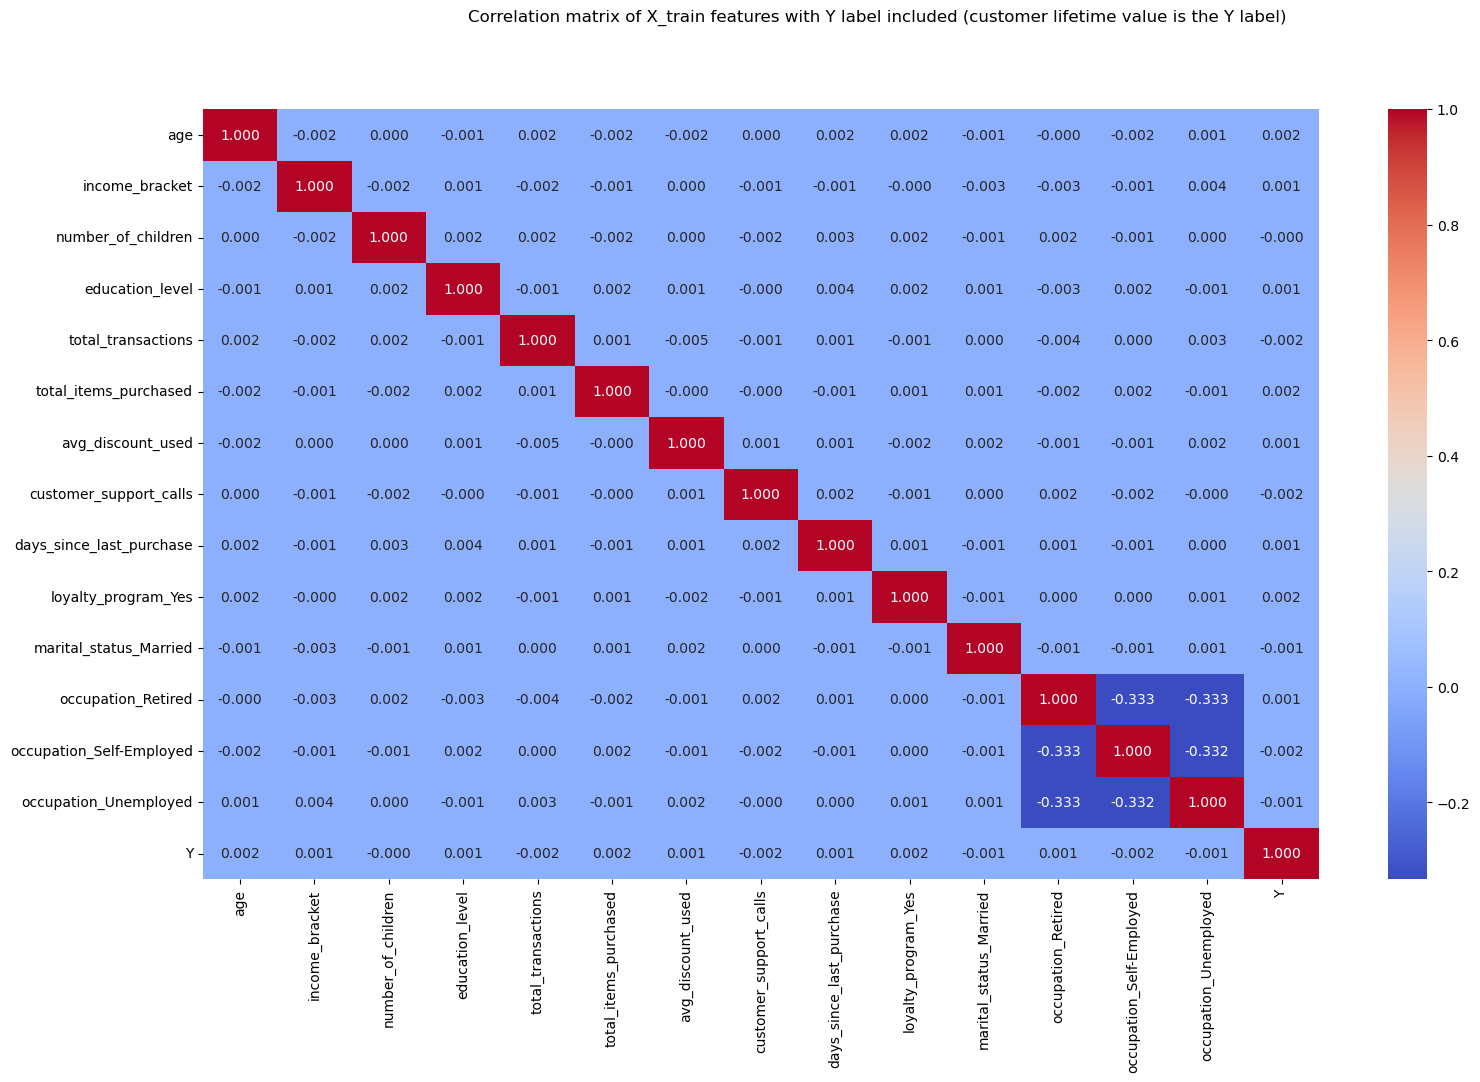

In [46]:
# correlation matrix to visualize relationships on our data set for training
temp_df = X_train.copy()
temp_df['Y'] = y_train
plt.clf()
corr_matrix = temp_df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.suptitle("Correlation matrix of X_train features with Y label included (customer lifetime value is the Y label)")
plt.show()

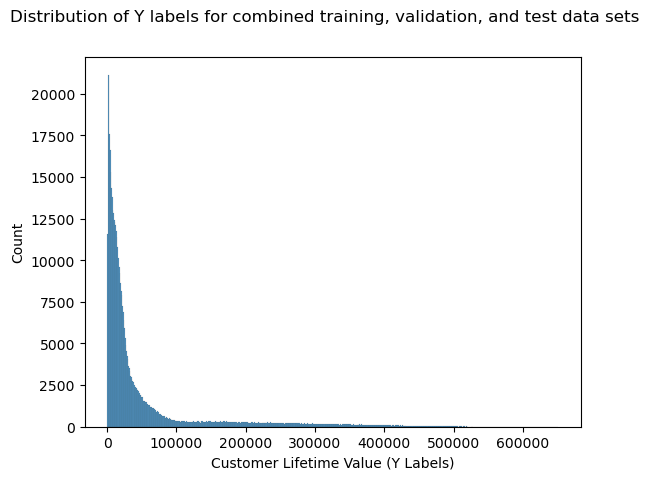

In [47]:
#Visualize distribiution of Y
plt.clf()
vstacked_y = np.concatenate((y_train,y_val,y_test)).flatten()
sns.histplot(vstacked_y)
plt.xlabel('Customer Lifetime Value (Y Labels)')
plt.ylabel('Count')
plt.suptitle('Distribution of Y labels for combined training, validation, and test data sets')

plt.show()

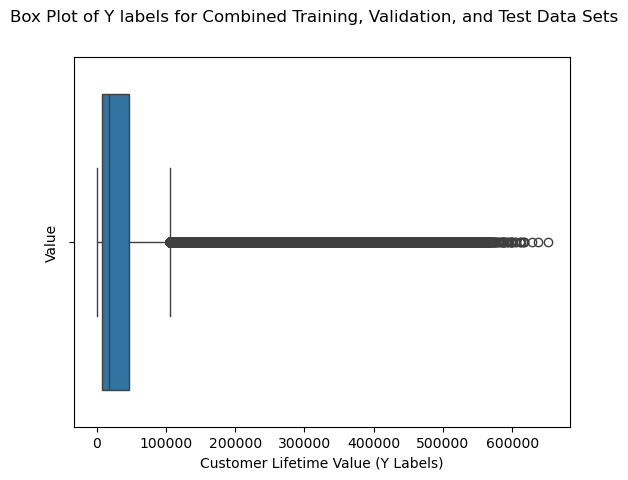

In [48]:
plt.clf()

vstacked_y = np.concatenate((y_train, y_val, y_test)).flatten()

sns.boxplot(x=vstacked_y)

plt.xlabel('Customer Lifetime Value (Y Labels)')
plt.ylabel('Value')
plt.suptitle('Box Plot of Y labels for Combined Training, Validation, and Test Data Sets')

plt.show()

In [49]:
import scipy.stats as stats
import numpy as np

# Assuming y_train contains your Y values for customer lifetime value
y_train = np.array(y_train)  # replace y_train with your actual Y data

# Calculate skewness and kurtosis
skewness = stats.skew(y_train)
kurtosis = stats.kurtosis(y_train)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 2.6403552660756335
Kurtosis: 6.812475002924071


    Skewness of y_train of 2.64 implies right skewed distribution, suggesting a few high value outliers. Kurtosis of 6.82 implies y_train has extreme outliers that can influence model’s predictions.

    To mitigate, we will log transformation on y_train (it is right skewed, log transformation should help); and then standard scale.

    For X_train we will scale only numerical columns, and not one hot or ordinary encoded columns. 

# Scaling.


In [50]:
summarize_dataframe(X_train)

,Column Name,Data Type,Null Count,Non-Null Count,Unique Count
0,age,int64,0,300000,62
1,income_bracket,int64,0,300000,3
2,number_of_children,int64,0,300000,5
3,education_level,int64,0,300000,4
4,total_transactions,int64,0,300000,99
5,total_items_purchased,int64,0,300000,499
6,avg_discount_used,float64,0,300000,51
7,customer_support_calls,int64,0,300000,20
8,days_since_last_purchase,int64,0,300000,365
9,loyalty_program_Yes,float64,0,300000,2


In [51]:
X_train.columns

Index(['age', 'income_bracket', 'number_of_children', 'education_level',
       'total_transactions', 'total_items_purchased', 'avg_discount_used',
       'customer_support_calls', 'days_since_last_purchase',
       'loyalty_program_Yes', 'marital_status_Married', 'occupation_Retired',
       'occupation_Self-Employed', 'occupation_Unemployed'],
      dtype='object')

In [52]:
# Define numerical columns for X_train (excluding one-hot encoded columns)
numerical_columns_X = [
    'age', 'number_of_children', 'total_transactions', 'total_items_purchased',
    'avg_discount_used', 'customer_support_calls', 'days_since_last_purchase'
]

scaler_X = StandardScaler()

# Scale only numerical features in X_train
X_train_std = X_train.copy()  
X_train_std[numerical_columns_X] = scaler_X.fit_transform(X_train[numerical_columns_X])

# Log transformation on y_train 
y_train_log = np.log1p(y_train)  # log(1 + y) to handle zero values safely

# Standard scaling on the transformed y_train
scaler_y = StandardScaler()
y_train_std = scaler_y.fit_transform(y_train_log.reshape(-1, 1))

# Apply the same transformations to X_val, X_test, and y_val, y_test

X_val_std = X_val.copy()
X_val_std[numerical_columns_X] = scaler_X.transform(X_val[numerical_columns_X])

X_test_std = X_test.copy()
X_test_std[numerical_columns_X] = scaler_X.transform(X_test[numerical_columns_X])

# Log transformation on y_val and y_test
y_val_log = np.log1p(y_val)
y_val_std = scaler_y.transform(y_val_log.reshape(-1, 1))

y_test_log = np.log1p(y_test)
y_test_std = scaler_y.transform(y_test_log.reshape(-1, 1))

# Output: transformed data: X_train_std, X_val_std, X_test_std, y_train_std, y_val_std, y_test_std


In [53]:
print("_"*150)
print("SHAPES OF SPLIT DATA SETS")
print("_"*150)
print(f"{ type(X_train_std) = }, { X_train_std.shape = }, { type(y_train_std) = } , { y_train_std.shape = }")
print(f"{ type(X_val_std) = }, { X_val_std.shape = }, { type(y_val_std) = } , { y_val_std.shape = }")
print(f"{ type(X_test_std) = }, { X_test_std.shape = }, { type(y_test_std) = } , { y_test_std.shape = }")
print("_"*150)
print("_"*150)

______________________________________________________________________________________________________________________________________________________
SHAPES OF SPLIT DATA SETS
______________________________________________________________________________________________________________________________________________________
 type(X_train_std) = <class 'pandas.core.frame.DataFrame'>,  X_train_std.shape = (300000, 14),  type(y_train_std) = <class 'numpy.ndarray'> ,  y_train_std.shape = (300000, 1)
 type(X_val_std) = <class 'pandas.core.frame.DataFrame'>,  X_val_std.shape = (100000, 14),  type(y_val_std) = <class 'numpy.ndarray'> ,  y_val_std.shape = (100000, 1)
 type(X_test_std) = <class 'pandas.core.frame.DataFrame'>,  X_test_std.shape = (100000, 14),  type(y_test_std) = <class 'numpy.ndarray'> ,  y_test_std.shape = (100000, 1)
______________________________________________________________________________________________________________________________________________________
________

# Preparation for Model run

# 
    scaler_y state variables that will be required throughout for reverse transformation to recover oroginal values

In [54]:
# Utility function to reverse transform

def compute_rmse_on_original_scale(y_pred_train, y_pred_val, y_train_std, y_val_std, scaler_y):
    """
    Computes the Train and Validation RMSE on the original scale after inverse transformations (log transformed y).

    Parameters:
    - y_pred_train: The predicted values on the standardized scale for the training set.
    - y_pred_val: The predicted values on the standardized scale for the validation set.
    - y_train_std: The standardized training target variable (after log transformation).
    - y_val_std: The standardized validation target variable (after log transformation).
    - scaler_y: The scaler used for standard scaling of y (should be fitted to y_train).

    Returns:
    - y_train_original, y_val_original
    - train_rmse: The RMSE on the original scale for the training set.
    - val_rmse: The RMSE on the original scale for the validation set.
    """
    
    # Inverse scaling of predictions
    y_pred_train_inv = scaler_y.inverse_transform(y_pred_train).flatten()
    y_pred_val_inv = scaler_y.inverse_transform(y_pred_val).flatten()

    # Reverse the log transformation for predictions
    y_pred_train_original = np.expm1(y_pred_train_inv)  # exp(y) - 1 to reverse log1p
    y_pred_val_original = np.expm1(y_pred_val_inv)  # exp(y) - 1 to reverse log1p

    # Inverse scaling for actual target values
    y_train_inv = scaler_y.inverse_transform(y_train_std).flatten()
    y_val_inv = scaler_y.inverse_transform(y_val_std).flatten()

    # Reverse the log transformation for actual values
    y_train_original = np.expm1(y_train_inv)  # exp(y) - 1 to reverse log1p
    y_val_original = np.expm1(y_val_inv)  # exp(y) - 1 to reverse log1p

    # Calculate RMSE on original scale
    train_rmse = np.sqrt(mean_squared_error(y_train_original, y_pred_train_original))
    val_rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_val_original))

    return y_train_original, y_val_original, train_rmse, val_rmse



# ________________________SECTION FOR MODEL RUN_______________

# Model 0: Simple Linear Regression

In [55]:
model = LinearRegression()
model.fit(X_train_std, y_train_std)

y_pred_train = model.predict(X_train_std)
y_pred_val = model.predict(X_val_std)

y_train_original, y_val_original, train_rmse, val_rmse = compute_rmse_on_original_scale(y_pred_train, y_pred_val, y_train_std, y_val_std, scaler_y)


In [56]:
print("_"*125)
print("Model 0: Simple Linear Regression Model Results")
print("_"*125) 
print(f"Train RMSE on original scale: {train_rmse:.2f}")
print(f"Validation RMSE on original scale: {val_rmse:.2f}")
mean_train_Y, mean_val_Y = np.mean(y_train_original), np.mean(y_val_original) 
print(f"mean_train_Y = {mean_train_Y:.2f}, mean_val_Y = {mean_val_Y:.2f}")
print(f"Train RMSE  = {(train_rmse/ mean_train_Y)*100:.2f}%,\n Validation RMSE  = {(val_rmse/ mean_val_Y)*100:.2f}%")
print("_"*125)

_____________________________________________________________________________________________________________________________
Model 0: Simple Linear Regression Model Results
_____________________________________________________________________________________________________________________________
Train RMSE on original scale: 95156.96
Validation RMSE on original scale: 94126.75
mean_train_Y = 53157.34, mean_val_Y = 52794.78
Train RMSE  = 179.01%,
 Validation RMSE  = 178.29%
_____________________________________________________________________________________________________________________________


# Model 1: FFNN

In [57]:
# Define the model using the Functional API
inputs = layers.Input(shape=(X_train_std.shape[1],))  

x = layers.Dense(64, activation='relu')(inputs)  
x = layers.Dense(32, activation='relu')(x)  
x = layers.Dense(16, activation='relu')(x)  

# Output layer for regression (single output neuron)
outputs = layers.Dense(1)(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Train the model with early stopping callback
history = model.fit(X_train_std, y_train_std, epochs=50, batch_size=32, 
                    validation_data=(X_val_std, y_val_std),
                    callbacks=[early_stopping])

Epoch 1/50


2025-04-06 00:07:01.238406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - loss: 1.0277 - mae: 0.7935 - val_loss: 1.1142 - val_mae: 0.8346
Epoch 2/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - loss: 1.0176 - mae: 0.7889 - val_loss: 1.0114 - val_mae: 0.7909
Epoch 3/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 61s 7ms/step - loss: 1.0303 - mae: 0.7953 - val_loss: 1.0064 - val_mae: 0.7824
Epoch 4/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - loss: 1.0381 - mae: 0.7999 - val_loss: 0.9934 - val_mae: 0.7806
Epoch 5/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - loss: 1.0454 - mae: 0.8025 - val_loss: 1.0364 - val_mae: 0.7935
Epoch 6/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - loss: 1.0398 - mae: 0.7998 - val_loss: 1.0013 - val_mae: 0.7858
Epoch 7/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - loss: 1.0395 - mae: 0.7996 - val_loss: 0.9998 - val_mae: 0.7850
Epoch 8/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - loss: 1.0471 - mae: 0.8031 - val_loss: 1.0192 - val_mae: 0.7975
Epoch 9/50
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 6

<Figure size 640x480 with 0 Axes>

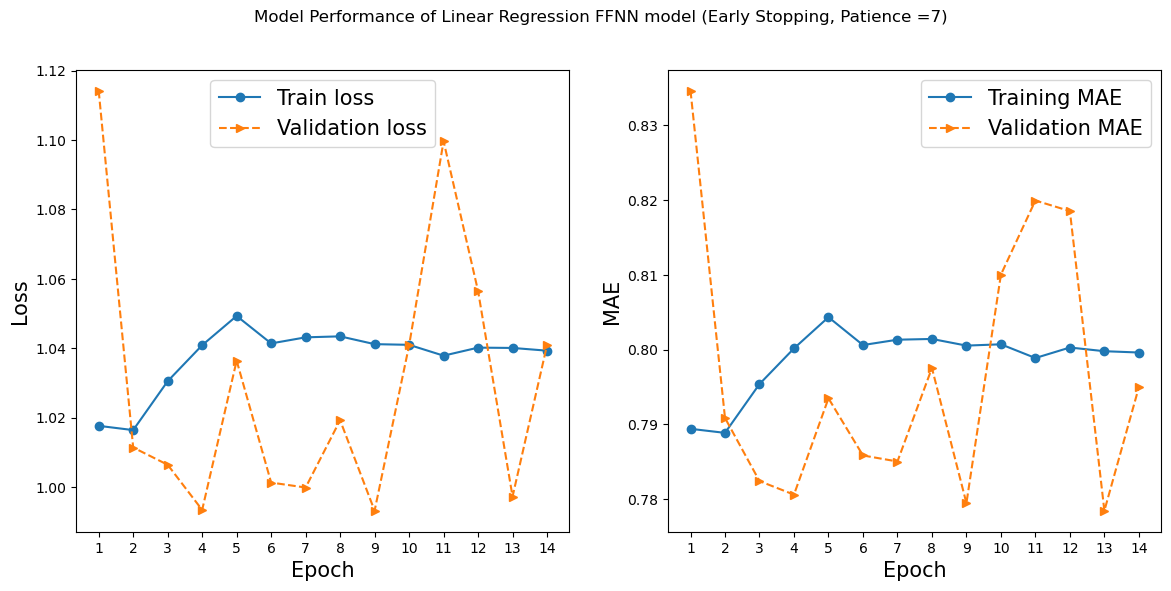

In [60]:
#Visualization 
# plot loss curves
plt.clf()
hist = history.history
x_data = np.arange(len(hist['loss'])) + 1

fix, axes = plt.subplots(1,2, figsize=(14,6))
axes = axes.flatten()

###we print losses to prevent the extremely high first epoch training loss from impacting plot resolution
axes[0].plot(x_data, hist['loss'], '-o', label='Train loss')
axes[0].plot(x_data, hist['val_loss'], '-->', label='Validation loss')
axes[0].legend(fontsize=15)
axes[0].set_xlabel('Epoch', size=15)
axes[0].set_ylabel('Loss', size=15)
ticks = x_data
axes[0].set_xticks(ticks)
#axes[1].set_ylim(0,3) ## trying to prevent the high first epoch training loss from 

axes[1].plot(x_data, hist['mae'], '-o', label='Training MAE')
axes[1].plot(x_data, hist['val_mae'], '-->', label='Validation MAE')
axes[1].legend(fontsize=15)
axes[1].set_xlabel('Epoch', size=15)
axes[1].set_ylabel('MAE', size=15)
#axes[1].set_ylim(0,1)
ticks = x_data
axes[1].set_xticks(ticks)
plt.suptitle("Model Performance of Linear Regression FFNN model (Early Stopping, Patience =7)")
plt.show()

In [61]:
# Make predictions
y_pred_train = model.predict(X_train_std)
y_pred_val = model.predict(X_val_std)

# Compute RMSE on the original scale (assuming compute_rmse_on_original_scale is defined)
y_train_original, y_val_original, train_rmse, val_rmse = compute_rmse_on_original_scale(y_pred_train, y_pred_val, y_train_std, y_val_std, scaler_y)

# Print RMSE results
print(f"Train RMSE (Original Scale): {train_rmse}")
print(f"Validation RMSE (Original Scale): {val_rmse}")

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 8s 901us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 883us/step
Train RMSE (Original Scale): 95006.12220911199
Validation RMSE (Original Scale): 93973.05097429572


In [63]:
print("_"*125)
print("Model 1: FFNN Regression Model Results")
print("_"*125) 
print(f"Train RMSE on original scale: {train_rmse:.2f}")
print(f"Validation RMSE on original scale: {val_rmse:.2f}")
mean_train_Y, mean_val_Y = np.mean(y_train_original), np.mean(y_val_original) 
print(f"mean_train_Y = {mean_train_Y:.2f}, mean_val_Y = {mean_val_Y:.2f}")
print(f"Train RMSE  = {(train_rmse/ mean_train_Y)*100:.2f}%,\n Validation RMSE  = {(val_rmse/ mean_val_Y)*100:.2f}%")
print("_"*125)

_____________________________________________________________________________________________________________________________
Model 1: FFNN Regression Model Results
_____________________________________________________________________________________________________________________________
Train RMSE on original scale: 95006.12
Validation RMSE on original scale: 93973.05
mean_train_Y = 53157.34, mean_val_Y = 52794.78
Train RMSE  = 178.73%,
 Validation RMSE  = 178.00%
_____________________________________________________________________________________________________________________________


# Model Results Analysis So Far (Notebook file: 207_FP_LFTV_Run_2_VSAPR5.ipynb)

    The heartbeat of a Customer Lifetime Value (CLV) are average purchase value, purchase frequency, total sales, customer lifespan. However, we had to calculate a ground truth for our data set —- calculate the CLV label for our examples because this label was missing —- and in calculation of this label we use these three variables and added some gaussian noise to calculate the label CLV.

    To prevent data leakage, we excluded average purchase value, purchase frequency, total sales, customer lifespan from our model runs. Both Linear Regression and FFNN Regression that we just ran did not use these features. This led to Validation RMSEs of 178.29% and 178% respectively from the two models. Such high validation RMSEs compare with similar experimental runs we did earlier that included a slightly different set of features but also did not include average purchase value, purchase frequency, total sales, customer lifespan as features (one such similar run earlier produced a validation RMSE of 92089.17, also very high).

    In real world, a business may choose to be OK with such large RMSEs. Why? Because CLV values are DIRECTIONAL indicators, and decisions are not made on the absolute value of a CLV for a customer. CLVs are used for comparisons, and thus a higher RMSE may indeed be acceptable. In addition, a marketing team may also exercise experience to produce CLV labels.

    But to complete our story, we will launch another run of CLV modeling. Now, we will use average purchase value, purchase frequency, total sales, membership years (a better (less direct) proxy for customer lifespan) as features in the model, but adjust each of them to include some noise. Our model will include noise-adjusted versions of each of these features.


# MODEL RUN PHASE 2 
    Include noise-adjusted versions of ‘adjusted_avg_purch_val’, 'adjusted_purchase_frequency', 'adjusted_membership_years’, 'adjusted_total_sales' in the model.

    We will also consider addition of some new, and dropping of existing features.

    We will run Model Phase 2 in a separate notebook.